In [1]:
import pandas as pd
import numpy as np
import unicodedata
import re

from bs4 import BeautifulSoup
import requests
import os
import json

import os
import unicodedata
import re
import json

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.model_selection

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import prepare as prep

In [2]:
df = prep.get_data('all_books.csv')

In [3]:
df.head(3)

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN


In [4]:
df.isna().sum()

title                   0
summary                 0
year_published          0
author                  0
review_count            0
number_of_ratings       0
length                  4
genre                   0
rating                  0
reviews              2026
dtype: int64

In [5]:
prep.clean_article(df, 'title')

In [6]:
prep.clean_article(df, 'summary')

In [7]:
df1 = pd.read_csv('books_feat_on_NYBS.csv', index_col=0)

In [8]:
prep.clean_article(df1, 'Book')

In [9]:
ser = df1['cleaned_Book']

In [10]:
prep.creat_tar(df, ser)

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",unsuccessful
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN,1493,from the author of 1491the bestselling study o...,unsuccessful
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN,1776,"in this masterful book, david mccullough tells...",unsuccessful
3,2312,The year is 2312. Scientific and technological...,2012,Kim Stanley Robinson,2520,19150,561.0,Science Fiction,3.50,NaN,2312,the year is 2312. scientific and technological...,unsuccessful
4,2666,"A cuatro profesores de literatura, Pelletier, ...",2004,Roberto Bolaño,4554,38750,1128.0,Fiction,4.19,NaN,2666,"a cuatro profesores de literatura, pelletier, ...",unsuccessful
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,Pierre: A Cautionary Tale in Five Chapters and...,"A story with a moral air about Pierre, who lea...",1962,Maurice Sendak,259,9511,48.0,Picture Books,4.28,[],pierre a cautionary tale in five chapters and ...,"a story with a moral air about pierre, who lea...",unsuccessful
3806,Eleven on Top,Stephanie Plum is thinking her career as a fug...,back,Janet Evanovich,2245,106923,NaN,Mystery,4.16,NaN,eleven on top,stephanie plum is thinking her career as a fug...,best seller
3807,Nothing to Lose,Two lonely towns in Colorado: Hope and Despair...,and.,Lee Child,3012,63995,NaN,Thriller,3.93,NaN,nothing to lose,two lonely towns in colorado hope and despair....,best seller
3808,Reflected in You,Gideon Cross. As beautiful and flawless on the...,2012,Sylvia Day,11060,339738,NaN,Romance,4.31,[],reflected in you,gideon cross. as beautiful and flawless on the...,best seller


In [11]:
#nltk.download('punkt')

In [12]:
#nltk.download('averaged_perceptron_tagger')

In [13]:
df['lemmatized_summary'] = df['cleaned_summary'].apply(prep.lemmatize_text)

In [14]:
df[['neg', 'neutral', 'pos', 'compound']] = df['summary'].apply(prep.feat_sent)

In [15]:
df.head(3)

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",unsuccessful,groundbreaking science history archaeology cha...,0.021,0.848,0.132,0.9393
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN,1493,from the author of 1491the bestselling study o...,unsuccessful,author bestselling study precolumbian americas...,0.044,0.869,0.088,0.9213
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN,1776,"in this masterful book, david mccullough tells...",unsuccessful,masterful david mccullough tell intensely huma...,0.097,0.835,0.068,-0.8309


In [16]:
df['sentiment'] = df['compound'].apply(prep.get_sentiment)

In [17]:
df.head(3)

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
0,1491,"In this groundbreaking work of science, histor...",back,Charles C. Mann,4581,81796,1492.0,History,4.04,NaN,1491,"in this groundbreaking work of science, histor...",unsuccessful,groundbreaking science history archaeology cha...,0.021,0.848,0.132,0.9393,very positive
1,1493,From the author of 1491—the best-selling study...,2011,Charles C. Mann,1603,18476,557.0,History,4.11,NaN,1493,from the author of 1491the bestselling study o...,unsuccessful,author bestselling study precolumbian americas...,0.044,0.869,0.088,0.9213,very positive
2,1776,"In this masterful book, David McCullough tells...",2005,David McCullough,8098,219448,386.0,History,4.08,NaN,1776,"in this masterful book, david mccullough tells...",unsuccessful,masterful david mccullough tell intensely huma...,0.097,0.835,0.068,-0.8309,very negative


# exploration

In [18]:
def split(df):
    train, test = train_test_split(df, test_size=.2, random_state=42, stratify=df.target)
    return train, test

In [19]:
df.shape

(3810, 19)

In [20]:
train, test = split(df)

In [21]:
train.head(3)

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,target,lemmatized_summary,neg,neutral,pos,compound,sentiment
3248,Zen in the Art of Archery,The path to achieving Zen (a balance between t...,1948,Eugen Herrigel,745,13640,81.0,Philosophy,3.99,[],zen in the art of archery,the path to achieving zen a balance between th...,unsuccessful,path achieve zen balance body mind brilliantly...,0.025,0.873,0.101,0.8807,very positive
1767,Sharks in the Time of Saviors,"In 1995 Kailua-Kona, Hawaii, on a rare family ...",2020,Kawai Strong Washburn,2493,16032,376.0,Fiction,3.85,[],sharks in the time of saviors,"in 1995 kailuakona, hawaii, on a rare family v...",unsuccessful,kailuakona hawaii rare family vacation sevenye...,0.098,0.744,0.158,0.9655,very positive
2494,The Rotters' Club,"Birmingham, England, c. 1973: industrial strik...",2001,Jonathan Coe,821,13374,415.0,Fiction,3.96,NaN,the rotters' club,"birmingham, england, c. 1973 industrial strike...",unsuccessful,birmingham england industrial strike bad pop m...,0.161,0.662,0.177,0.5378,very positive


In [22]:
train.shape

(3048, 19)

In [23]:
train.columns

Index(['title', 'summary', 'year_published', 'author', 'review_count',
       'number_of_ratings', 'length', 'genre', 'rating', 'reviews',
       'cleaned_title', 'cleaned_summary', 'target', 'lemmatized_summary',
       'neg', 'neutral', 'pos', 'compound', 'sentiment'],
      dtype='object')

# Which words (ngrams ?) appear more often in summaries with a negative sentiment ?

In [24]:
#from nltk.tokenize import word_tokenize

In [25]:
#df_neg = train[train['sentiment'] == 'negative']

In [26]:
#df_neg['tokenized_summary'] = df_neg['cleaned_summary'].apply(word_tokenize)

In [27]:
#all_summaries = list(df_neg['tokenized_summary'])

In [28]:
#from nltk import FreqDist

#freq_dist = FreqDist(word for summary in all_summaries for word in summary)

In [29]:
#freq_dist

In [30]:
#common_words = freq_dist.most_common(50)

In [31]:
#df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

In [32]:
#df_common_words

# Implementing Stopwords

In [101]:
train['sentiment'].count()

3048

In [86]:
train['sentiment'].value_counts()

very positive    1522
very negative    1019
positive          244
negative          238
neutral            25
Name: sentiment, dtype: int64

In [107]:
train['target'].value_counts()

unsuccessful    2919
best seller      129
Name: target, dtype: int64

In [87]:
# subset df split of train into only negative values of 'sentiment' column
df_neg = train[train['sentiment'].isin(['negative', 'very negative'])]

In [88]:
# Tokenize words
words = df_neg['cleaned_summary'].str.lower().str.cat(sep=' ').split()

In [89]:
# Create a list of additional stopwords
additional_stopwords = ['.','1']

In [90]:
# Add the additional stopwords to the default set of stopwords
stop_words = set(stopwords.words('english') + additional_stopwords)

In [91]:
# Remove stopwords
words = [word for word in words if word not in stop_words]

In [92]:
# Get frequency distribution of words, bigrams, and trigrams
freq_dist = nltk.FreqDist(words)
freq_dist_bigram = nltk.FreqDist(nltk.bigrams(words))
freq_dist_trigram = nltk.FreqDist(nltk.trigrams(words))

In [93]:
# Get 50 most common words, bigrams, and trigrams
most_common_words = freq_dist.most_common(50)
most_common_bigram = freq_dist_bigram.most_common(50)
most_common_trigram = freq_dist_trigram.most_common(50)

In [94]:
# Convert to dataframes for visualizing ease
df_common_words = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
df_common_bigram = pd.DataFrame(most_common_bigram, columns=['Bigram', 'Frequency'])
df_common_trigram = pd.DataFrame(most_common_trigram, columns=['Trigram', 'Frequency'])

In [95]:
df_common_words.head(10)

,Word,Frequency
0,one,753
1,new,597
2,life,435
3,world,391
4,story,309
5,two,297
6,must,284
7,even,274
8,first,268
9,find,257


In [96]:
df_common_bigram.head(10)

,Bigram,Frequency
0,"(new, york)",154
1,"(york, times)",84
2,"(bestselling, author)",67
3,"(times, bestselling)",60
4,"(world, war)",48
5,"(eve, dallas)",32
6,"(alternate, cover)",28
7,"(young, woman)",27
8,"(years, ago,)",26
9,"(cover, edition)",25


In [97]:
df_common_trigram.head(10)

,Trigram,Frequency
0,"(new, york, times)",82
1,"(york, times, bestselling)",60
2,"(times, bestselling, author)",39
3,"(alternate, cover, edition)",17
4,"(new, york, city)",16
5,"(world, war, ii)",14
6,"(lieutenant, eve, dallas)",12
7,"(world, war, ii,)",11
8,"(cover, edition, found)",9
9,"(librarian's, note, alternate)",9


In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
train['target'].value_counts()

unsuccessful    2919
best seller      129
Name: target, dtype: int64

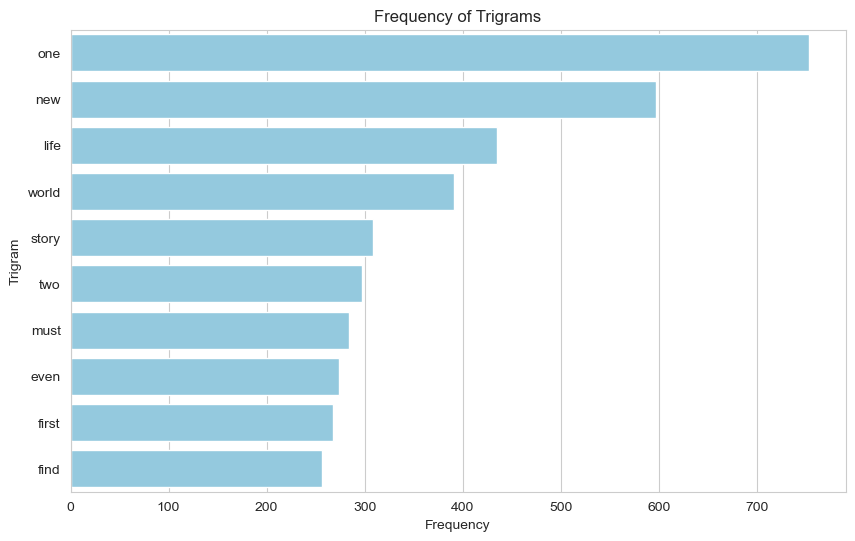

In [99]:
# create the horizontal count plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x="Frequency", y="Word", data=df_common_words.head(10), color="skyblue")
plt.title('Frequency of Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

In [109]:
# subset df split of train into only negative values of 'sentiment' column
df_neg = train[train['sentiment'].isin(['negative', 'very negative'])]

# Tokenize words
words = df_neg['cleaned_summary'].str.lower().str.cat(sep=' ').split()

# Create a list of additional stopwords
additional_stopwords = ['.','1']

# Add the additional stopwords to the default set of stopwords
stop_words = set(stopwords.words('english') + additional_stopwords)

# Remove stopwords
words = [word for word in words if word not in stop_words]

In [110]:
# Get frequency distribution of words, bigrams, and trigrams
freq_dist = nltk.FreqDist(words)
freq_dist_bigram = nltk.FreqDist(nltk.bigrams(words))
freq_dist_trigram = nltk.FreqDist(nltk.trigrams(words))

In [111]:
# Get 50 most common words, bigrams, and trigrams for each target type
most_common_words = {}
most_common_bigram = {}
most_common_trigram = {}

In [112]:
for target_type in train['target'].unique():
    df_target = df_neg[df_neg['target'] == target_type]
    words = df_target['cleaned_summary'].str.lower().str.cat(sep=' ').split()
    words = [word for word in words if word not in stop_words]
    freq_dist_target = nltk.FreqDist(words)
    most_common_words[target_type] = freq_dist_target.most_common(50)
    freq_dist_bigram_target = nltk.FreqDist(nltk.bigrams(words))
    most_common_bigram[target_type] = freq_dist_bigram_target.most_common(50)
    freq_dist_trigram_target = nltk.FreqDist(nltk.trigrams(words))
    most_common_trigram[target_type] = freq_dist_trigram_target.most_common(50)

ValueError: Could not interpret input 'target'

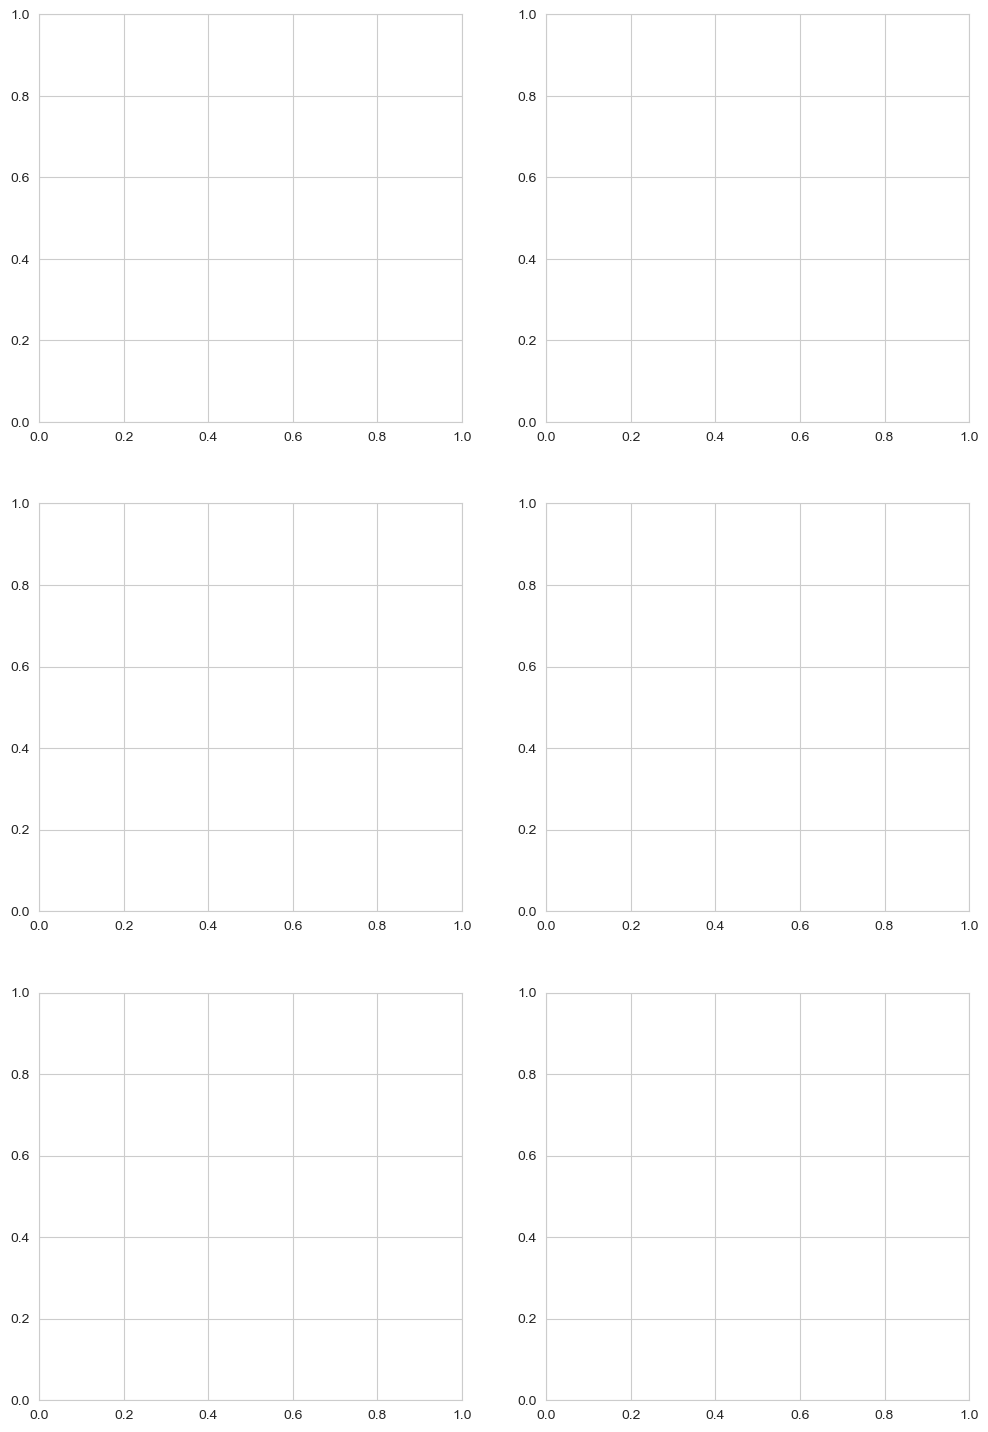

In [113]:
# Visualize the counts with a countplot and hue on the "target" column
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
for i, (ngram_type, most_common) in enumerate([('Unigram', most_common_words),
                                                ('Bigram', most_common_bigram),
                                                ('Trigram', most_common_trigram)]):
    
    for j, (target_type, freq_dist) in enumerate(most_common.items()):
        
        df_freq_dist = pd.DataFrame(freq_dist, columns=[ngram_type, 'Frequency'])
        sns.set_style("whitegrid")
        # the Plot
        sns.barplot(x='Frequency', y=ngram_type, data=df_freq_dist, color="skyblue", ax=axes[i][j], hue='target')
        axes[i][j].set_title(f'{ngram_type} Frequency for {target_type} Targets')
        axes[i][j].set_xlabel('Frequency')
        axes[i][j].set_ylabel(ngram_type)

plt.tight_layout()
plt.show()

In [ ]:
# Subset df split of train into only negative values of 'sentiment' column
df_neg = train[train['sentiment'].isin(['negative', 'very negative'])]

# Tokenize words
words = df_neg['cleaned_summary'].str.lower().str.cat(sep=' ').split()

# Create a list of additional stopwords
additional_stopwords = ['.','1']

# Add the additional stopwords to the default set of stopwords
stop_words = set(stopwords.words('english') + additional_stopwords)

# Remove stopwords
words = [word for word in words if word not in stop_words]

# Get frequency distribution of words, bigrams, and trigrams
freq_dist = nltk.FreqDist(words)
freq_dist_bigram = nltk.FreqDist(nltk.bigrams(words))
freq_dist_trigram = nltk.FreqDist(nltk.trigrams(words))

# Get 50 most common words, bigrams, and trigrams
most_common_words = freq_dist.most_common(50)
most_common_bigram = freq_dist_bigram.most_common(50)
most_common_trigram = freq_dist_trigram.most_common(50)

# Convert to dataframes for visualizing ease
df_common_words = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
df_common_bigram = pd.DataFrame(most_common_bigram, columns=['Bigram', 'Frequency'])
df_common_trigram = pd.DataFrame(most_common_trigram, columns=['Trigram', 'Frequency'])

# Merge with train to add target column
df_common_words = df_common_words.merge(df_neg[['title', 'target']], on='title')
df_common_bigram = df_common_bigram.merge(df_neg[['title', 'target']], on='title')
df_common_trigram = df_common_trigram.merge(df_neg[['title', 'target']], on='title')

# Create the count plots
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x="Frequency", y="Word", hue="target", data=df_common_words.head(10), color="skyblue")
plt.title('Frequency of Unigrams')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x="Frequency", y="Bigram", hue="target", data=df_common_bigram.head(10), color="skyblue")
plt.title('Frequency of Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x="Frequency", y="Trigram", hue="target", data=df_common_trigram.head(10), color="skyblue")
plt.title('Frequency of Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()
